
# Setting the Random Seed




In [ ]:
import random

# Set a random seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading history data as a df

In [ ]:
history_df = pd.read_csv("/content/injury_history(injury_history).csv")
history_df.head()

,Player.ID,Name,Group.Id,Injury Type,Body Part,Side,Injury Date,Severity,Recovery Time (days),Additional Notes
0,101,Jordan Matthews,201,Muscle Strain,Quadriceps,Right,12/5/2023,Grade 2,51,Grade 2 quadriceps strain with partial tearing...
1,101,Jordan Matthews,201,Tendonitis,Wrist,Left,10/25/2023,NaN,11,De Quervain's tenosynovitis. Swelling and pain...
2,101,Jordan Matthews,201,Tendonitis,Shoulder,Right,7/22/2023,NaN,12,Rotator cuff tendonitis due to overuse. Anti-i...
3,103,Malik Robinson,203,Strain,Groin,Right,6/28/2023,Grade 1,20,"Grade 1 groin strain, characterized by mild ov..."
4,103,Malik Robinson,203,Fracture,Wrist,Left,2/14/2023,NaN,68,Distal radius fracture. Cast applied. Recovery...


In [ ]:
history_df.shape

(21, 10)

# Reading player session data as df

In [ ]:
session_df = pd.read_csv("/content/injury_history(player_sessions).csv", encoding = 'latin1')
session_df.head()

,Name,Player.ID,Group.Id,Group.name,League.ID,Session.ID,Session_Date,Position,Distance..mi.,Distance...min..mi.,...,Heart.Rate..min....bpm.,Heart.Rate..max....bpm.,Human.Core.Temperature..?ò....F.,Human.Core.Temperature..max.....F.,TRIMP,Heart.Rate.Recoveries,Jump.Height..max....ft.,Changes.of.Orientation,Exertions,Disk.Usage....
0,Anthony Lopez,112,212,Group 1,301,1001,1/1/2023,Center,4.58,0.12,...,74,198,99.47,101.24,261,5,2.31,229,307,58.56
1,Anthony Lopez,112,212,Group 1,301,1002,1/3/2023,Center,1.18,0.11,...,62,179,99.56,99.33,270,6,2.44,427,180,44.93
2,Anthony Lopez,112,212,Group 1,301,1003,1/4/2023,Center,5.59,0.14,...,78,172,100.06,102.31,149,4,3.04,383,440,15.32
3,Anthony Lopez,112,212,Group 1,301,1004,1/6/2023,Center,3.22,0.09,...,64,186,100.45,101.10,180,10,3.17,462,450,21.46
4,Anthony Lopez,112,212,Group 1,301,1005,1/7/2023,Center,2.19,0.10,...,62,146,98.73,100.91,152,4,1.28,118,416,20.51


In [ ]:
session_df.shape

(2604, 30)

# Reading Imbalance data as df

In [ ]:
imbalance_df = pd.read_csv("/content/injury_history(muscle_imbalance_data).csv")
imbalance_df.head()

,Player.ID,Session ID,Player Name,Date Recorded,Hamstring To Quad Ratio,Quad Imbalance Percent,HamstringImbalance Percent,Calf Imbalance Percent,Groin Imbalance Percent
0,112,101,Anthony Lopez,1/1/2023,0.808741,-10.149294,-8.208145,-10.176416,-10.258755
1,112,102,Anthony Lopez,2/1/2023,0.814355,-10.105784,-8.229693,-10.106144,-10.063777
2,112,103,Anthony Lopez,3/1/2023,0.887331,-10.027546,-8.897757,-10.257486,-9.990676
3,112,104,Anthony Lopez,4/1/2023,0.929176,-10.137407,-9.419432,-10.220899,-10.179258
4,112,105,Anthony Lopez,5/1/2023,0.866234,-9.958386,-8.626291,-10.412659,-10.208611


In [ ]:
imbalance_df.shape

(182, 9)

# Seperating players who had injuries vs non injured

In [ ]:
non_injured_df = imbalance_df.merge(history_df, on='Player.ID', how='left', indicator=True)

# Filter out players who do not appear in history_df (indicated by '_merge' == 'left_only')
non_injured_players = non_injured_df[non_injured_df['_merge'] == 'left_only'].drop(columns=['_merge'])

non_injured_players['Player Name'].unique()

array(['David Carter', 'Isaiah Thompson', 'Marcus Daniels',
       'Xavier Foster'], dtype=object)

# Adding muscle imbalances to injured players

In [ ]:
imbalance_df['Player Name'].unique()

array(['Anthony Lopez', 'Brandon Mitchell', 'Cameron Howard',
       'David Carter', 'Isaiah Thompson', 'Jordan Matthews',
       'Julian Simmons', 'Kyle Saunders', 'Lennon Van', 'Malik Robinson',
       'Marcus Daniels', 'Miles Richardson', 'Noah Bradley',
       'Xavier Foster'], dtype=object)

# Adding muscle imbalances to non-injured players

In [ ]:
players_of_interest = ['David Carter', 'Isaiah Thompson', 'Marcus Daniels',
       'Xavier Foster']
non_injured_imbalance = non_injured_players[non_injured_players['Player Name'].isin(players_of_interest)]
non_injured_imbalance.head()

,Player.ID,Session ID,Player Name,Date Recorded,Hamstring To Quad Ratio,Quad Imbalance Percent,HamstringImbalance Percent,Calf Imbalance Percent,Groin Imbalance Percent,Name,Group.Id,Injury Type,Body Part,Side,Injury Date,Severity,Recovery Time (days),Additional Notes
91,102,101,David Carter,1/1/2023,0.973068,-11.506832,-11.196928,-11.415844,-11.569736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,102,102,David Carter,2/1/2023,0.939882,-11.396017,-10.710908,-11.266125,-11.491920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,102,103,David Carter,3/1/2023,0.922781,-11.208819,-10.343290,-11.208613,-11.531948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,102,104,David Carter,4/1/2023,0.826671,-11.285189,-9.329138,-11.380893,-11.482253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,102,105,David Carter,5/1/2023,0.848020,-11.310994,-9.591951,-11.530964,-11.520733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Removing post injury imbalance measurements to not skew data

In [ ]:
injured_df = pd.merge(history_df, imbalance_df, on="Player.ID", how="inner")
before_injured_df = injured_df[injured_df['Date Recorded'] <= injured_df['Injury Date']]
before_injured_df.head()

,Player.ID,Name,Group.Id,Injury Type,Body Part,Side,Injury Date,Severity,Recovery Time (days),Additional Notes,Session ID,Player Name,Date Recorded,Hamstring To Quad Ratio,Quad Imbalance Percent,HamstringImbalance Percent,Calf Imbalance Percent,Groin Imbalance Percent
0,101,Jordan Matthews,201,Muscle Strain,Quadriceps,Right,12/5/2023,Grade 2,51,Grade 2 quadriceps strain with partial tearing...,101,Jordan Matthews,1/1/2023,0.610768,5.481295,3.347801,5.409497,5.616962
9,101,Jordan Matthews,201,Muscle Strain,Quadriceps,Right,12/5/2023,Grade 2,51,Grade 2 quadriceps strain with partial tearing...,110,Jordan Matthews,10/1/2023,0.466391,5.330960,2.486309,5.737901,5.803808
10,101,Jordan Matthews,201,Muscle Strain,Quadriceps,Right,12/5/2023,Grade 2,51,Grade 2 quadriceps strain with partial tearing...,111,Jordan Matthews,11/1/2023,0.474902,5.211226,2.474823,5.662138,5.720153
11,101,Jordan Matthews,201,Muscle Strain,Quadriceps,Right,12/5/2023,Grade 2,51,Grade 2 quadriceps strain with partial tearing...,112,Jordan Matthews,12/1/2023,0.400000,5.240664,2.096266,5.591946,5.689814
12,101,Jordan Matthews,201,Muscle Strain,Quadriceps,Right,12/5/2023,Grade 2,51,Grade 2 quadriceps strain with partial tearing...,113,Jordan Matthews,1/1/2024,0.420480,5.359744,2.253666,5.740048,5.836472


# Simple Statistical table of cleaned before injury df

In [ ]:
before_injured_df[['Hamstring To Quad Ratio', 'Quad Imbalance Percent',
            'HamstringImbalance Percent', 'Calf Imbalance Percent',
            'Groin Imbalance Percent']].describe()

,Hamstring To Quad Ratio,Quad Imbalance Percent,HamstringImbalance Percent,Calf Imbalance Percent,Groin Imbalance Percent
count,135.000000,135.000000,135.000000,135.000000,135.000000
mean,0.759751,3.705989,2.835113,3.679639,3.658826
std,0.217880,8.041424,6.460215,7.931674,7.865432
min,0.400000,-10.465638,-9.449238,-10.412659,-10.258755
25%,0.603132,-3.503481,-1.676800,-2.984444,-3.324809
50%,0.770156,5.211226,3.347801,5.409497,5.156992
75%,0.860706,6.857556,5.593816,6.945133,6.762994
max,1.200000,15.234443,13.037198,14.879619,14.655813


# Simple Statistical table of cleaned before injury df

In [ ]:
non_injured_df[['Hamstring To Quad Ratio', 'Quad Imbalance Percent',
            'HamstringImbalance Percent', 'Calf Imbalance Percent',
            'Groin Imbalance Percent']].describe()

,Hamstring To Quad Ratio,Quad Imbalance Percent,HamstringImbalance Percent,Calf Imbalance Percent,Groin Imbalance Percent
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,0.735785,2.154148,1.136210,2.109864,2.126210
std,0.232476,8.362013,6.502867,8.308497,8.286346
min,0.400000,-11.506832,-11.196928,-11.719519,-11.677551
25%,0.522961,-3.619018,-2.411216,-3.157962,-3.413696
50%,0.721675,3.794248,2.253666,3.600178,3.700607
75%,0.877420,6.651476,5.289199,6.476034,6.368668
max,1.200000,15.234443,13.037198,14.879619,14.992623


# Combining clean injured data and non injured players  

In [ ]:
import pandas as pd

# Assign injury status
before_injured_df['Injury'] = 1  # 1 for injured players
non_injured_df['Injury'] = 0     # 0 for non-injured players

# Merge the two dataframes
combined_df = pd.concat([before_injured_df, non_injured_df], ignore_index=True)

combined_df.shape

<ipython-input-108-9be07634b524>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_injured_df['Injury'] = 1  # 1 for injured players


(460, 20)

# Model for finding the muscle imbalance(s) that are the most accurate predictors of injury  

In [144]:
import pandas as pd
import itertools
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np
import random

# Set a random seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)

# Define the independent variables and dependent variable
independent_vars = ['Groin Imbalance Percent', 'Quad Imbalance Percent', 'HamstringImbalance Percent', 'Calf Imbalance Percent']
dependent_var = 'Injury'  # Assuming 'Injury' is binary: 1 if injured, 0 if not

# Iterate over all possible combinations of independent variables
all_combinations = []
for i in range(1, len(independent_vars) + 1):
    all_combinations.extend(itertools.combinations(independent_vars, i))

# Define models to use
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'Perceptron': Perceptron(),
    'RidgeClassifier': RidgeClassifier(),
    'SGDClassifier': SGDClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'Bagging': BaggingClassifier(),
    'Boosting': GradientBoostingClassifier()
}

# Data to store results
results = []

# Train and evaluate models for each combination
for combination in all_combinations:
    # Select subset of independent variables for the current combination
    X = combined_df[list(combination)]
    y = combined_df[dependent_var]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate each model
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predict and calculate metrics
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)

        # Store the results
        results.append({
            'Model': model_name,
            'Features': combination,
            'Accuracy': accuracy,
            'F1 Score': f1,
            'Confusion Matrix': cm
        })

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)

# Sorting results

In [143]:
results_df.sort_values(by=['F1 Score'], ascending=False).head(1)

,Model,Features,Accuracy,F1 Score,Confusion Matrix
34,Perceptron,"(Groin Imbalance Percent, Quad Imbalance Percent)",0.684783,0.60274,"[[41, 22], [7, 22]]"


# Cleaning injury data post model to not include readings post injury

In [ ]:
merged_history_imbalance = pd.merge(imbalance_df, history_df, on='Player.ID', how='inner')

# Step 2: Filter to keep only records where 'Date Recorded' is before 'Injury Date'
filtered_imbalance = merged_history_imbalance[merged_history_imbalance['Date Recorded'] < merged_history_imbalance['Injury Date']]

filtered_imbalance.shape

(133, 18)

# Creation of Final Merged df for further analysis

In [ ]:
final_merged_df = pd.merge(session_df, filtered_imbalance, left_on=['Player.ID', 'Session_Date'], right_on=['Player.ID', 'Date Recorded'], how='left')

# Drop redundant columns if necessary (like 'Date Recorded' and 'Injury Date')
final_merged_df = final_merged_df.drop(columns=['Date Recorded', 'Injury Date'])

final_merged_df.shape

(2622, 45)

In [ ]:
final_merged_df.columns

Index(['Name_x', 'Player.ID', 'Group.Id_x', 'Group.name', 'League.ID',
       'Session.ID', 'Session_Date', 'Position', 'Distance..mi.',
       'Distance...min..mi.', 'Duration..s.', 'Steps', 'Speed....of.max......',
       'Speed..max....mph.', 'Speed..?ò...mph.', 'Time..s.',
       'Accumulated.Acceleration.Load', 'Anaerobic.Activity..distance...mi.',
       'Jump.Load..J.', 'Heart.Rate..?ò...bpm.', 'Heart.Rate..min....bpm.',
       'Heart.Rate..max....bpm.', 'Human.Core.Temperature..?ò....F.',
       'Human.Core.Temperature..max.....F.', 'TRIMP', 'Heart.Rate.Recoveries',
       'Jump.Height..max....ft.', 'Changes.of.Orientation', 'Exertions',
       'Disk.Usage....', 'Session ID', 'Player Name',
       'Hamstring To Quad Ratio', 'Quad Imbalance Percent',
       'HamstringImbalance Percent', 'Calf Imbalance Percent',
       'Groin Imbalance Percent', 'Name_y', 'Group.Id_y', 'Injury Type',
       'Body Part', 'Side', 'Severity', 'Recovery Time (days)',
       'Additional Notes'],
    

# Cleaning merged database by removing unecessary columns


In [ ]:
injured_players = set(history_df['Player.ID'])
final_merged_df['injury_status'] = final_merged_df['Player.ID'].apply(lambda x: 1 if x in injured_players else 0)


print(final_merged_df[['Player.ID', 'injury_status']].head())

   Player.ID  injury_status
0        112              1
1        112              1
2        112              1
3        112              1
4        112              1


In [ ]:
useless_list = ['Name_x','Group.Id_x', 'Group.name', 'League.ID',
       'Session.ID', 'Session_Date', 'Position', 'Disk.Usage....', 'Session ID', 'Player Name',
               'Name_y', 'Group.Id_y', 'Injury Type',
       'Body Part', 'Side', 'Severity', 'Recovery Time (days)',
       'Additional Notes']
final_merged_df = final_merged_df.drop(columns=useless_list)
final_merged_df.shape

(2622, 28)

In [ ]:
final_merged_df = final_merged_df.replace(np.nan, 0)
final_merged_df.isna().sum()

,0
Distance_Miles,0
Miles/Min,0
Duration_Seconds,0
Steps,0
Percent_Max_Possible_Speed,0
Max_Speed_mph,0
Average_Speed_mph,0
Time_Seconds,0
Accumulated_Acceleration_Load,0
Anaerobic_Distance_Miles,0


In [ ]:
new_names = ['Distance_Miles', 'Miles/Min', 'Duration_Seconds', 'Steps', 'Percent_Max_Possible_Speed',
             'Max_Speed_mph', 'Average_Speed_mph', 'Time_Seconds', 'Accumulated_Acceleration_Load',
             'Anaerobic_Distance_Miles', 'Jump_Load_Jules', 'Average_Heart_Rate_bpm', 'Min_Heart_Rate_bpm',
             'Max_Heart_Rate_bpm', 'Average_Core_Temperature_F', 'Max_Core_Temperature_F', 'Training_Impulse',
             'Num_Heart_Rate_Recoveries', 'Max_Jump_Height_Ft', 'Num_Orientation_Changes', 'Num_Exertions',
             'Hamstring To Quad Ratio', 'Quad Imbalance Percent', 'Hamstring Imbalance Percent',
             'Calf Imbalance Percent', 'Groin Imbalance Percent']
final_merged_df.columns = new_names
final_merged_df.columns

Index(['Distance_Miles', 'Miles/Min', 'Duration_Seconds', 'Steps',
       'Percent_Max_Possible_Speed', 'Max_Speed_mph', 'Average_Speed_mph',
       'Time_Seconds', 'Accumulated_Acceleration_Load',
       'Anaerobic_Distance_Miles', 'Jump_Load_Jules', 'Average_Heart_Rate_bpm',
       'Min_Heart_Rate_bpm', 'Max_Heart_Rate_bpm',
       'Average_Core_Temperature_F', 'Max_Core_Temperature_F',
       'Training_Impulse', 'Num_Heart_Rate_Recoveries', 'Max_Jump_Height_Ft',
       'Num_Orientation_Changes', 'Num_Exertions', 'Hamstring To Quad Ratio',
       'Quad Imbalance Percent', 'Hamstring Imbalance Percent',
       'Calf Imbalance Percent', 'Groin Imbalance Percent'],
      dtype='object')

# Groin

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


predictor_variables = ['Distance_Miles', 'Miles/Min', 'Duration_Seconds', 'Steps', 'Percent_Max_Possible_Speed',
             'Max_Speed_mph', 'Average_Speed_mph', 'Time_Seconds', 'Accumulated_Acceleration_Load',
             'Anaerobic_Distance_Miles', 'Jump_Load_Jules', 'Average_Heart_Rate_bpm', 'Min_Heart_Rate_bpm',
             'Max_Heart_Rate_bpm', 'Average_Core_Temperature_F', 'Max_Core_Temperature_F', 'Training_Impulse',
             'Num_Heart_Rate_Recoveries', 'Max_Jump_Height_Ft', 'Num_Orientation_Changes', 'Num_Exertions']
# Define predictor variables and target
X =final_merged_df[predictor_variables]  # Predictor variables
y = final_merged_df['Groin Imbalance Percent']  # Target variable

# Step 1: Fit Random Forest model to determine feature importances
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Calculate feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances and filter by threshold
importance_df = pd.DataFrame({'Feature': predictor_variables, 'Importance': feature_importances})
filtered_importance_df = importance_df[importance_df['Importance'] >= 0.07].sort_values(by='Importance', ascending=False)

# Filter predictor variables based on importance threshold
filtered_predictor_variables = filtered_importance_df['Feature'].tolist()
print("Filtered Predictor Variables:", filtered_predictor_variables)

# Step 2: Use only filtered predictor variables for the final model
X_filtered = final_merged_df[filtered_predictor_variables]
target = 'Groin Imbalance Percent'
# Separate labeled and unlabeled data using the filtered predictors
labeled_data = final_merged_df.dropna(subset=[target])
unlabeled_data = final_merged_df[final_merged_df[target] == 0].copy()

# Features and target for labeled data using filtered predictors
X_labeled = labeled_data[filtered_predictor_variables]
y_labeled = labeled_data[target]

# Features for unlabeled data using filtered predictors
X_unlabeled = unlabeled_data[filtered_predictor_variables]

param_grid = {
    'n_estimators': [10, 50, 100],   # Number of base estimators in the ensemble
    'max_samples': [0.5, 0.75, 1.0], # Fraction of samples to draw for each base estimator
    'max_features': [0.5, 0.75, 1.0] # Fraction of features to draw for each base estimator
}

# Initialize GridSearchCV with BaggingRegressor and the parameter grid
model = GridSearchCV(BaggingRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)

# Iterative self-training
for iteration in range(10):  # Limit to 10 iterations for convergence
    # Check if there is enough labeled data to train the model
    if len(X_labeled) == 0 or len(y_labeled) == 0:
        print("Insufficient labeled data to train the model.")
        break

    # Train the model on labeled data
    model.fit(X_labeled, y_labeled)

    # Check if there is any unlabeled data left for prediction
    if len(X_unlabeled) == 0:
        print("No data left in X_unlabeled to predict.")
        break

    # Predict on unlabeled data
    y_unlabeled_pred = model.predict(X_unlabeled)

    # Identify high-confidence predictions
    confidence_threshold = 0.1 * np.std(y_labeled)
    confident_indices = np.where(np.abs(y_unlabeled_pred - y_unlabeled_pred.mean()) <= confidence_threshold)[0]

    # If no confident predictions, stop
    if len(confident_indices) == 0:
        print(f"No confident predictions found for {target} at iteration {iteration}.")
        break

    # Add confident predictions to labeled data
    X_confident = X_unlabeled.iloc[confident_indices]
    y_confident = y_unlabeled_pred[confident_indices]

    # Append confident samples to labeled data
    X_labeled = pd.concat([X_labeled, X_confident], axis=0)
    y_labeled = pd.concat([y_labeled, pd.Series(y_confident)], axis=0)

    # Drop newly labeled samples from the unlabeled set
    X_unlabeled = X_unlabeled.drop(X_confident.index)
    print(f"Iteration {iteration + 1}: Added {len(confident_indices)} new labeled observations.")

# Final evaluation on labeled data
y_pred_final = model.predict(X_labeled)
final_error = mean_squared_error(y_labeled, y_pred_final)
r_squared = r2_score(y_labeled, y_pred_final)

# Print the results
print(f"Final training error (MSE) for {target}: {final_error}")
print(f"R-squared for {target}: {r_squared}")

Filtered Predictor Variables: ['Time_Seconds', 'Steps', 'Max_Jump_Height_Ft', 'Average_Speed_mph']
Iteration 1: Added 2134 new labeled observations.
Iteration 2: Added 217 new labeled observations.
Iteration 3: Added 57 new labeled observations.
Iteration 4: Added 34 new labeled observations.
Iteration 5: Added 18 new labeled observations.
Iteration 6: Added 13 new labeled observations.
Iteration 7: Added 8 new labeled observations.
Iteration 8: Added 9 new labeled observations.
Iteration 9: Added 7 new labeled observations.
Iteration 10: Added 3 new labeled observations.
Final training error (MSE) for Groin Imbalance Percent: 0.04830183909517565
R-squared for Groin Imbalance Percent: 0.9426643419523945


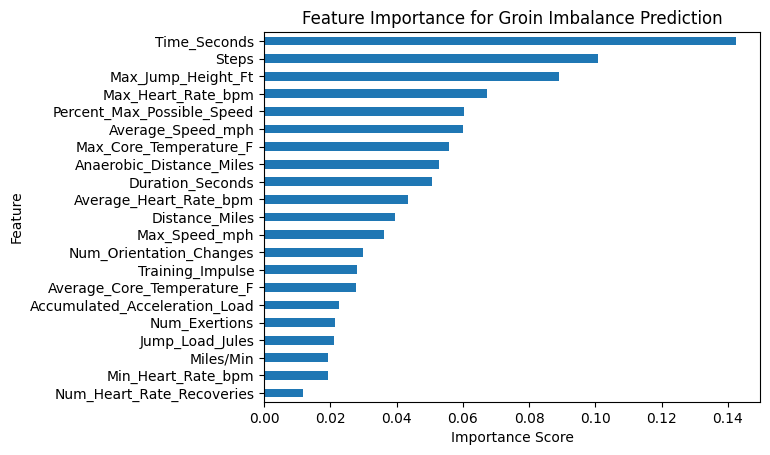

In [ ]:
# Sample code for feature importance plot
importance_df.sort_values(by='Importance', ascending=True).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Feature Importance for Groin Imbalance Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


# Quad

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


predictor_variables = ['Distance_Miles', 'Miles/Min', 'Duration_Seconds', 'Steps', 'Percent_Max_Possible_Speed',
             'Max_Speed_mph', 'Average_Speed_mph', 'Time_Seconds', 'Accumulated_Acceleration_Load',
             'Anaerobic_Distance_Miles', 'Jump_Load_Jules', 'Average_Heart_Rate_bpm', 'Min_Heart_Rate_bpm',
             'Max_Heart_Rate_bpm', 'Average_Core_Temperature_F', 'Max_Core_Temperature_F', 'Training_Impulse',
             'Num_Heart_Rate_Recoveries', 'Max_Jump_Height_Ft', 'Num_Orientation_Changes', 'Num_Exertions']
# Define predictor variables and target
X =final_merged_df[predictor_variables]  # Predictor variables
y = final_merged_df['Quad Imbalance Percent']  # Target variable

# Step 1: Fit Random Forest model to determine feature importances
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Calculate feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances and filter by threshold
importance_df = pd.DataFrame({'Feature': predictor_variables, 'Importance': feature_importances})
filtered_importance_df = importance_df[importance_df['Importance'] >= 0.07].sort_values(by='Importance', ascending=False)

# Filter predictor variables based on importance threshold
filtered_predictor_variables = filtered_importance_df['Feature'].tolist()
print("Filtered Predictor Variables:", filtered_predictor_variables)

# Step 2: Use only filtered predictor variables for the final model
X_filtered = final_merged_df[filtered_predictor_variables]
target = 'Quad Imbalance Percent'
# Separate labeled and unlabeled data using the filtered predictors
labeled_data = final_merged_df.dropna(subset=[target])
unlabeled_data = final_merged_df[final_merged_df[target] == 0].copy()

# Features and target for labeled data using filtered predictors
X_labeled = labeled_data[filtered_predictor_variables]
y_labeled = labeled_data[target]

# Features for unlabeled data using filtered predictors
X_unlabeled = unlabeled_data[filtered_predictor_variables]

param_grid = {
    'n_estimators': [10, 50, 100],   # Number of base estimators in the ensemble
    'max_samples': [0.5, 0.75, 1.0], # Fraction of samples to draw for each base estimator
    'max_features': [0.5, 0.75, 1.0] # Fraction of features to draw for each base estimator
}

# Initialize GridSearchCV with BaggingRegressor and the parameter grid
model = GridSearchCV(BaggingRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)

# Iterative self-training
for iteration in range(10):  # Limit to 10 iterations for convergence
    # Check if there is enough labeled data to train the model
    if len(X_labeled) == 0 or len(y_labeled) == 0:
        print("Insufficient labeled data to train the model.")
        break

    # Train the model on labeled data
    model.fit(X_labeled, y_labeled)

    # Check if there is any unlabeled data left for prediction
    if len(X_unlabeled) == 0:
        print("No data left in X_unlabeled to predict.")
        break

    # Predict on unlabeled data
    y_unlabeled_pred = model.predict(X_unlabeled)

    # Identify high-confidence predictions
    confidence_threshold = 0.1 * np.std(y_labeled)
    confident_indices = np.where(np.abs(y_unlabeled_pred - y_unlabeled_pred.mean()) <= confidence_threshold)[0]

    # If no confident predictions, stop
    if len(confident_indices) == 0:
        print(f"No confident predictions found for {target} at iteration {iteration}.")
        break

    # Add confident predictions to labeled data
    X_confident = X_unlabeled.iloc[confident_indices]
    y_confident = y_unlabeled_pred[confident_indices]

    # Append confident samples to labeled data
    X_labeled = pd.concat([X_labeled, X_confident], axis=0)
    y_labeled = pd.concat([y_labeled, pd.Series(y_confident)], axis=0)

    # Drop newly labeled samples from the unlabeled set
    X_unlabeled = X_unlabeled.drop(X_confident.index)
    print(f"Iteration {iteration + 1}: Added {len(confident_indices)} new labeled observations.")

# Final evaluation on labeled data
y_pred_final = model.predict(X_labeled)
final_error = mean_squared_error(y_labeled, y_pred_final)
r_squared = r2_score(y_labeled, y_pred_final)

# Print the results
print(f"Final training error (MSE) for {target}: {final_error}")
print(f"R-squared for {target}: {r_squared}")

Filtered Predictor Variables: ['Time_Seconds', 'Steps', 'Max_Jump_Height_Ft']
Iteration 1: Added 2065 new labeled observations.
Iteration 2: Added 72 new labeled observations.
Iteration 3: Added 26 new labeled observations.
Iteration 4: Added 12 new labeled observations.
Iteration 5: Added 12 new labeled observations.
Iteration 6: Added 2 new labeled observations.
Iteration 7: Added 24 new labeled observations.
Iteration 8: Added 1 new labeled observations.
Iteration 9: Added 27 new labeled observations.
No confident predictions found for Quad Imbalance Percent at iteration 9.
Final training error (MSE) for Quad Imbalance Percent: 0.43046052490063563
R-squared for Quad Imbalance Percent: 0.5279858128799462


In [ ]:
# Sample code for feature importance plot
importance_df.sort_values(by='Importance', ascending=True).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Feature Importance for Quad Imbalance Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Plot feature importances from the RandomForest model
plt.figure(figsize=(10, 6))
importance_df.sort_values(by='Importance', ascending=True).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Feature Importance for Quad Imbalance Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Calf

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


predictor_variables = ['Distance_Miles', 'Miles/Min', 'Duration_Seconds', 'Steps', 'Percent_Max_Possible_Speed',
             'Max_Speed_mph', 'Average_Speed_mph', 'Time_Seconds', 'Accumulated_Acceleration_Load',
             'Anaerobic_Distance_Miles', 'Jump_Load_Jules', 'Average_Heart_Rate_bpm', 'Min_Heart_Rate_bpm',
             'Max_Heart_Rate_bpm', 'Average_Core_Temperature_F', 'Max_Core_Temperature_F', 'Training_Impulse',
             'Num_Heart_Rate_Recoveries', 'Max_Jump_Height_Ft', 'Num_Orientation_Changes', 'Num_Exertions']
# Define predictor variables and target
X =final_merged_df[predictor_variables]  # Predictor variables
y = final_merged_df['Calf Imbalance Percent']  # Target variable

# Step 1: Fit Random Forest model to determine feature importances
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Calculate feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances and filter by threshold
importance_df = pd.DataFrame({'Feature': predictor_variables, 'Importance': feature_importances})
filtered_importance_df = importance_df[importance_df['Importance'] >= 0.07].sort_values(by='Importance', ascending=False)

# Filter predictor variables based on importance threshold
filtered_predictor_variables = filtered_importance_df['Feature'].tolist()
print("Filtered Predictor Variables:", filtered_predictor_variables)

# Step 2: Use only filtered predictor variables for the final model
X_filtered = final_merged_df[filtered_predictor_variables]
target = 'Calf Imbalance Percent'
# Separate labeled and unlabeled data using the filtered predictors
labeled_data = final_merged_df.dropna(subset=[target])
unlabeled_data = final_merged_df[final_merged_df[target] == 0].copy()

# Features and target for labeled data using filtered predictors
X_labeled = labeled_data[filtered_predictor_variables]
y_labeled = labeled_data[target]

# Features for unlabeled data using filtered predictors
X_unlabeled = unlabeled_data[filtered_predictor_variables]

param_grid = {
    'n_estimators': [10, 50, 100],   # Number of base estimators in the ensemble
    'max_samples': [0.5, 0.75, 1.0], # Fraction of samples to draw for each base estimator
    'max_features': [0.5, 0.75, 1.0] # Fraction of features to draw for each base estimator
}

# Initialize GridSearchCV with BaggingRegressor and the parameter grid
model = GridSearchCV(BaggingRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)

# Iterative self-training
for iteration in range(10):  # Limit to 10 iterations for convergence
    # Check if there is enough labeled data to train the model
    if len(X_labeled) == 0 or len(y_labeled) == 0:
        print("Insufficient labeled data to train the model.")
        break

    # Train the model on labeled data
    model.fit(X_labeled, y_labeled)

    # Check if there is any unlabeled data left for prediction
    if len(X_unlabeled) == 0:
        print("No data left in X_unlabeled to predict.")
        break

    # Predict on unlabeled data
    y_unlabeled_pred = model.predict(X_unlabeled)

    # Identify high-confidence predictions
    confidence_threshold = 0.1 * np.std(y_labeled)
    confident_indices = np.where(np.abs(y_unlabeled_pred - y_unlabeled_pred.mean()) <= confidence_threshold)[0]

    # If no confident predictions, stop
    if len(confident_indices) == 0:
        print(f"No confident predictions found for {target} at iteration {iteration}.")
        break

    # Add confident predictions to labeled data
    X_confident = X_unlabeled.iloc[confident_indices]
    y_confident = y_unlabeled_pred[confident_indices]

    # Append confident samples to labeled data
    X_labeled = pd.concat([X_labeled, X_confident], axis=0)
    y_labeled = pd.concat([y_labeled, pd.Series(y_confident)], axis=0)

    # Drop newly labeled samples from the unlabeled set
    X_unlabeled = X_unlabeled.drop(X_confident.index)
    print(f"Iteration {iteration + 1}: Added {len(confident_indices)} new labeled observations.")

# Final evaluation on labeled data
y_pred_final = model.predict(X_labeled)
final_error = mean_squared_error(y_labeled, y_pred_final)
r_squared = r2_score(y_labeled, y_pred_final)

# Print the results
print(f"Final training error (MSE) for {target}: {final_error}")
print(f"R-squared for {target}: {r_squared}")

Filtered Predictor Variables: ['Time_Seconds', 'Steps', 'Max_Jump_Height_Ft']
Iteration 1: Added 2015 new labeled observations.
Iteration 2: Added 99 new labeled observations.
Iteration 3: Added 18 new labeled observations.
Iteration 4: Added 4 new labeled observations.
Iteration 5: Added 13 new labeled observations.
Iteration 6: Added 6 new labeled observations.
Iteration 7: Added 31 new labeled observations.
Iteration 8: Added 4 new labeled observations.
No confident predictions found for Calf Imbalance Percent at iteration 8.
Final training error (MSE) for Calf Imbalance Percent: 0.4153541399082543
R-squared for Calf Imbalance Percent: 0.5402474584565435


In [ ]:
import matplotlib.pyplot as plt

# Plot feature importances from the RandomForest model
plt.figure(figsize=(10, 6))
importance_df.sort_values(by='Importance', ascending=True).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Feature Importance for Calf Imbalance Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# Hamstring

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV


predictor_variables = ['Distance_Miles', 'Miles/Min', 'Duration_Seconds', 'Steps', 'Percent_Max_Possible_Speed',
             'Max_Speed_mph', 'Average_Speed_mph', 'Time_Seconds', 'Accumulated_Acceleration_Load',
             'Anaerobic_Distance_Miles', 'Jump_Load_Jules', 'Average_Heart_Rate_bpm', 'Min_Heart_Rate_bpm',
             'Max_Heart_Rate_bpm', 'Average_Core_Temperature_F', 'Max_Core_Temperature_F', 'Training_Impulse',
             'Num_Heart_Rate_Recoveries', 'Max_Jump_Height_Ft', 'Num_Orientation_Changes', 'Num_Exertions']
# Define predictor variables and target
X =final_merged_df[predictor_variables]  # Predictor variables
y = final_merged_df['Hamstring Imbalance Percent']  # Target variable

# Step 1: Fit Random Forest model to determine feature importances
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Calculate feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances and filter by threshold
importance_df = pd.DataFrame({'Feature': predictor_variables, 'Importance': feature_importances})
filtered_importance_df = importance_df[importance_df['Importance'] >= 0.07].sort_values(by='Importance', ascending=False)

# Filter predictor variables based on importance threshold
filtered_predictor_variables = filtered_importance_df['Feature'].tolist()
print("Filtered Predictor Variables:", filtered_predictor_variables)

# Step 2: Use only filtered predictor variables for the final model
X_filtered = final_merged_df[filtered_predictor_variables]
target = 'Hamstring Imbalance Percent'
# Separate labeled and unlabeled data using the filtered predictors
labeled_data = final_merged_df.dropna(subset=[target])
unlabeled_data = final_merged_df[final_merged_df[target] == 0].copy()

# Features and target for labeled data using filtered predictors
X_labeled = labeled_data[filtered_predictor_variables]
y_labeled = labeled_data[target]

# Features for unlabeled data using filtered predictors
X_unlabeled = unlabeled_data[filtered_predictor_variables]

param_grid = {
    'n_estimators': [10, 50, 100],   # Number of base estimators in the ensemble
    'max_samples': [0.5, 0.75, 1.0], # Fraction of samples to draw for each base estimator
    'max_features': [0.5, 0.75, 1.0] # Fraction of features to draw for each base estimator
}

# Initialize GridSearchCV with BaggingRegressor and the parameter grid
model = GridSearchCV(BaggingRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)

# Iterative self-training
for iteration in range(10):  # Limit to 10 iterations for convergence
    # Check if there is enough labeled data to train the model
    if len(X_labeled) == 0 or len(y_labeled) == 0:
        print("Insufficient labeled data to train the model.")
        break

    # Train the model on labeled data
    model.fit(X_labeled, y_labeled)

    # Check if there is any unlabeled data left for prediction
    if len(X_unlabeled) == 0:
        print("No data left in X_unlabeled to predict.")
        break

    # Predict on unlabeled data
    y_unlabeled_pred = model.predict(X_unlabeled)

    # Identify high-confidence predictions
    confidence_threshold = 0.1 * np.std(y_labeled)
    confident_indices = np.where(np.abs(y_unlabeled_pred - y_unlabeled_pred.mean()) <= confidence_threshold)[0]

    # If no confident predictions, stop
    if len(confident_indices) == 0:
        print(f"No confident predictions found for {target} at iteration {iteration}.")
        break

    # Add confident predictions to labeled data
    X_confident = X_unlabeled.iloc[confident_indices]
    y_confident = y_unlabeled_pred[confident_indices]

    # Append confident samples to labeled data
    X_labeled = pd.concat([X_labeled, X_confident], axis=0)
    y_labeled = pd.concat([y_labeled, pd.Series(y_confident)], axis=0)

    # Drop newly labeled samples from the unlabeled set
    X_unlabeled = X_unlabeled.drop(X_confident.index)
    print(f"Iteration {iteration + 1}: Added {len(confident_indices)} new labeled observations.")

# Final evaluation on labeled data
y_pred_final = model.predict(X_labeled)
final_error = mean_squared_error(y_labeled, y_pred_final)
r_squared = r2_score(y_labeled, y_pred_final)

# Print the results
print(f"Final training error (MSE) for {target}: {final_error}")
print(f"R-squared for {target}: {r_squared}")

Filtered Predictor Variables: ['Time_Seconds', 'Steps', 'Max_Jump_Height_Ft', 'Average_Speed_mph']
Iteration 1: Added 2314 new labeled observations.
Iteration 2: Added 71 new labeled observations.
Iteration 3: Added 56 new labeled observations.
Iteration 4: Added 28 new labeled observations.
Iteration 5: Added 12 new labeled observations.
Iteration 6: Added 10 new labeled observations.
Iteration 7: Added 4 new labeled observations.
Iteration 8: Added 6 new labeled observations.
Iteration 9: Added 7 new labeled observations.
Iteration 10: Added 5 new labeled observations.
Final training error (MSE) for Hamstring Imbalance Percent: 0.029389073460353504
R-squared for Hamstring Imbalance Percent: 0.9472306616208215


In [148]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# Selecting relevant columns based on the model and most successful combination
X = combined_df[['Groin Imbalance Percent', 'Quad Imbalance Percent', 'Calf Imbalance Percent', 'HamstringImbalance Percent']]
y = combined_df['Injury']  # Assuming "Injury" is the binary column indicating injury

# Splitting the data into training and testing sets for consistency with the user's model approach
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Perceptron model
perceptron_model = Perceptron(max_iter=1000, random_state=42)
perceptron_model.fit(X_train, y_train)

# Predict probabilities of injury for the testing set (using decision function)
# Since Perceptron does not output probabilities, we'll use decision scores to rank likelihood
decision_scores = perceptron_model.decision_function(X_test)

# Adding the results to a DataFrame to analyze ranges of muscle imbalances where injuries are most likely
test_results = X_test.copy()
test_results['Injury Likelihood Score'] = decision_scores
test_results['Injury Predicted'] = perceptron_model.predict(X_test)

# Filter rows with higher injury likelihood scores for range analysis
# Using scores as an approximation (higher score indicates higher likelihood of injury)
high_risk_cases = test_results[test_results['Injury Likelihood Score'] > 0]

# Display ranges for "Groin Imbalance Percent" and "Quad Imbalance Percent" where injuries are likely
high_risk_groin_range = (high_risk_cases['Groin Imbalance Percent'].min(), high_risk_cases['Groin Imbalance Percent'].max())
high_risk_quad_range = (high_risk_cases['Quad Imbalance Percent'].min(), high_risk_cases['Quad Imbalance Percent'].max())
high_risk_calf_range = (high_risk_cases['Calf Imbalance Percent'].min(), high_risk_cases['Calf Imbalance Percent'].max())
high_risk_hamstring_range = (high_risk_cases['HamstringImbalance Percent'].min(), high_risk_cases['HamstringImbalance Percent'].max())

print(f"Range for 'Groin Imbalance Percent' where injuries are likely: {high_risk_groin_range}")
print(f"Range for 'Quad Imbalance Percent' where injuries are likely: {high_risk_quad_range}")
print(f"Range for 'Calf Imbalance Percent' where injuries are likely: {high_risk_calf_range}")
print(f"Range for 'HamstringImbalance Percent' where injuries are likely: {high_risk_hamstring_range}")

Range for 'Groin Imbalance Percent' where injuries are likely: (-11.62629458, -1.573554967)
Range for 'Quad Imbalance Percent' where injuries are likely: (-11.48367355, -1.519449309)
Range for 'Calf Imbalance Percent' where injuries are likely: (-11.65905094, -1.909032224)
Range for 'HamstringImbalance Percent' where injuries are likely: (-9.903778967, -0.902643728)


In [169]:
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-generic-recommended
!pip install nbconvert

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package texlive-generic-recommended


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!jupyter nbconvert --to pdf 'SAIL_Orange_Hoops.ipynb'


Mounted at /content/drive
